## IGO15600_IGO15601_IGO15771_IGO16686_combined - Slc4a11-MCD Rosa26-mTmG traced
4/1/2024 - Data generated from Slc4a11-MCD mice mTmG given Tamoxifen at either 6 weeks or 12 weeks and traced for 2 weeks. Data submitted by Chun-Hao/EB analyzed by Jason
Analyze global run on cellranger v6 data and create h5_ad files for further analysis

In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import math
import matplotlib
from matplotlib import pyplot as plt

from pathlib import Path
import anndata

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_56536/2080842915.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
plt.rcParams['svg.fonttype'] = 'none'
plt.rcParams["font.family"] = "Arial"
#plt.rcParams['figure.figsize'] = (3,4)

In [3]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
np.random.seed(1573)   #fix so we can reproduce later

scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.3 scipy==1.12.0 pandas==2.2.0 scikit-learn==1.4.0 statsmodels==0.14.1 igraph==0.11.3 pynndescent==0.5.11


In [4]:
#Path("./figures").mkdir(parents=True, exist_ok=True) # generate figures here
Path("./write").mkdir(parents=True, exist_ok=True) # write h5ad here

In [5]:
adata1 = anndata.read('../IGO15600/write/allmice-tumor-IGO15600.h5ad')
adata2 = anndata.read('../IGO15601/write/allmice-tumor-IGO15601.h5ad')
adata3 = anndata.read('../IGO15771/write/allmice-tumor-IGO15771.h5ad')
adata4 = anndata.read('../IGO16686/write/allmice-tumor-IGO16686-nointrons.h5ad')

/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


In [6]:
adata = adata1.concatenate(adata2, adata3, adata4, join='inner', batch_categories=['14wk', '8wk','14wk2','12wk_3d'])
adata.uns['log1p'] = {}
adata.uns['log1p']['base'] = None

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_56536/2049517209.py:1: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  adata = adata1.concatenate(adata2, adata3, adata4, join='inner', batch_categories=['14wk', '8wk','14wk2','12wk_3d'])


## Now select the traced mice (ie remove carrier cells)

In [7]:
adata.obs.Classification.value_counts()

Classification
BD1940_B0304_mKate2+               1278
BF1303_B0301_GFP+                   811
BA1624_B0305_GFP+_Carrier           547
BH1094_B0302_GFP+                   376
BL1606_B0303                        354
BB1010_mKate+                       262
BL1237_B0302                        239
BD1870_Epcam+                       199
BH1065_B0301_GFP+                   138
BH1290_B0304_GFP+                   138
BD1621_B0302_GFP+                   119
BL1646_B0301                        102
BL1241_B0307                         99
BD1623_B0303_Live+Dump-_Carrier      93
BH1129_B0303_GFP+                    90
BL1124_B0305                         67
BH1066_GFP+                          61
BL1233_B0306                         58
BL1121_B0304                         57
BH1719_Live+Immune-                  11
Name: count, dtype: int64

In [8]:
adata = adata[~adata.obs.Classification.isin(['BD1940_B0304_mKate2+','BB1010_mKate+',
                                             'BD1870_Epcam+','BD1623_B0303_Live+Dump-_Carrier','BH1719_Live+Immune-','BA1624_B0305_GFP+_Carrier','BL1241_B0307'])]

## Define sorting groups

In [9]:
adata.obs['Sorting_Groups'] = 'traced'
adata.obs['Sorting_Groups'].value_counts()

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_56536/1794197820.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata.obs['Sorting_Groups'] = 'traced'


Sorting_Groups
traced    2610
Name: count, dtype: int64

In [10]:
adata.obs.Classification.value_counts()

Classification
BF1303_B0301_GFP+    811
BH1094_B0302_GFP+    376
BL1606_B0303         354
BL1237_B0302         239
BH1065_B0301_GFP+    138
BH1290_B0304_GFP+    138
BD1621_B0302_GFP+    119
BL1646_B0301         102
BH1129_B0303_GFP+     90
BL1124_B0305          67
BH1066_GFP+           61
BL1233_B0306          58
BL1121_B0304          57
Name: count, dtype: int64

In [11]:
adata.obs[['batch','Classification']].value_counts()

batch    Classification   
14wk     BF1303_B0301_GFP+    811
8wk      BH1094_B0302_GFP+    376
12wk_3d  BL1606_B0303         354
         BL1237_B0302         239
8wk      BH1065_B0301_GFP+    138
         BH1290_B0304_GFP+    138
14wk     BD1621_B0302_GFP+    119
12wk_3d  BL1646_B0301         102
8wk      BH1129_B0303_GFP+     90
12wk_3d  BL1124_B0305          67
14wk2    BH1066_GFP+           61
12wk_3d  BL1233_B0306          58
         BL1121_B0304          57
Name: count, dtype: int64

In [12]:
adata.obs['Group'] = adata.obs['batch'].replace('14wk2','14wk')

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_56536/682876118.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  adata.obs['Group'] = adata.obs['batch'].replace('14wk2','14wk')


In [13]:
adata.obs[['Group','Classification']].value_counts()

Group    Classification   
14wk     BF1303_B0301_GFP+    811
8wk      BH1094_B0302_GFP+    376
12wk_3d  BL1606_B0303         354
         BL1237_B0302         239
8wk      BH1065_B0301_GFP+    138
         BH1290_B0304_GFP+    138
14wk     BD1621_B0302_GFP+    119
12wk_3d  BL1646_B0301         102
8wk      BH1129_B0303_GFP+     90
12wk_3d  BL1124_B0305          67
14wk     BH1066_GFP+           61
12wk_3d  BL1233_B0306          58
         BL1121_B0304          57
Name: count, dtype: int64

## Set highly variable genes

In [14]:
sc.pp.highly_variable_genes(adata, batch_key='batch')

extracting highly variable genes


/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False i

    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nanmean at 0x10a804cc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby("gene").agg(
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nanmean at 0x10a804cc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df = df.groupby("gene").agg(
/Users/chanj2/opt/miniconda3/envs/scbackup/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:508: FutureWarning: The provided callable <function nansum at 0x10a8047c0> is current

In [15]:
adata.var.highly_variable = adata.var.highly_variable_intersection

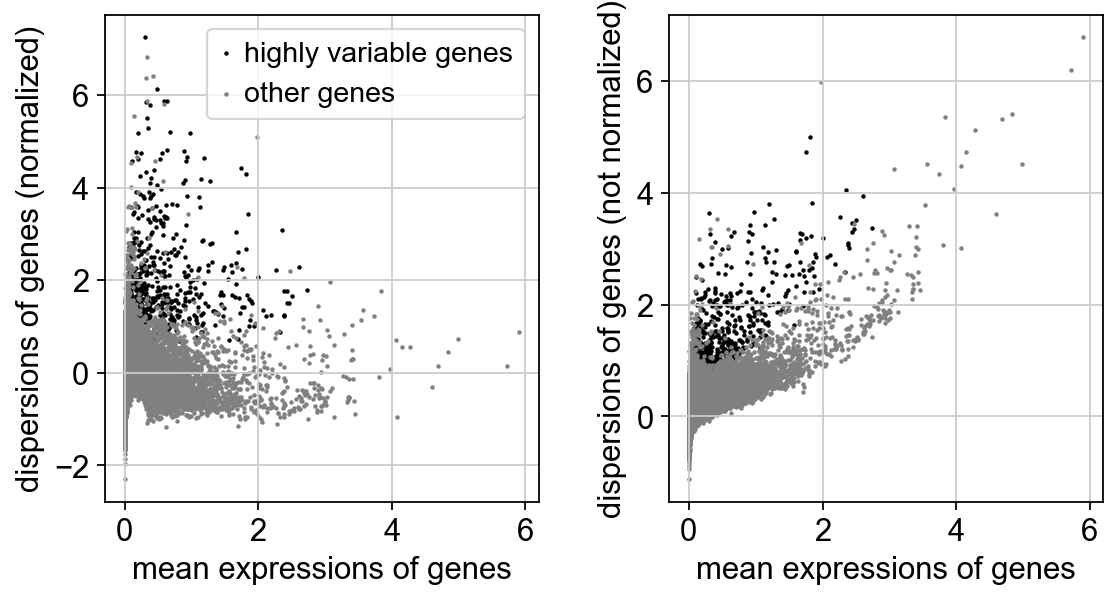

In [16]:
sc.pl.highly_variable_genes(adata)

In [17]:
#Ensure marker genes aren't making an impact to highly variable gene analysis downstream
adata.var.highly_variable['EGFP'] = False
adata.var.highly_variable['mScarlet'] = False
adata.var.highly_variable['Cre'] = False
adata.var.highly_variable['ERT'] = False
adata.var.highly_variable['iDTR'] = False
adata.var.highly_variable['tdTomato'] = False
adata.var.highly_variable['mKate2'] = False

/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_56536/1697892543.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  adata.var.highly_variable['EGFP'] = False
/var/folders/xc/wjwqs2j55dqgp2ghrn6nmlj1nlk7kz/T/ipykernel_56536/169789

In [18]:
adata.raw = adata

In [19]:
adata.write('write/allmice-IGO15600_IGO15601_IGO15771_IGO16686_combined.h5ad', compression='gzip')